## Image Classification 

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [26]:
tf.test.is_built_with_cuda()

True

In [27]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
y_train.shape

(50000, 1)

In [30]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Data Visualization

In [32]:
def plot_sample(index):
    plt.figure(figsize = (10,2))
    plt.imshow(X_train[index])

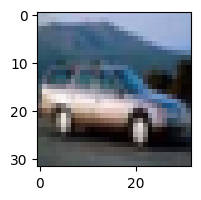

In [33]:
plot_sample(4)

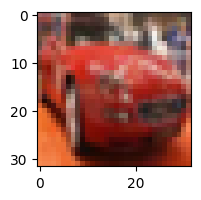

In [34]:
plot_sample(5)

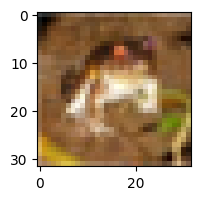

In [35]:
plot_sample(0)

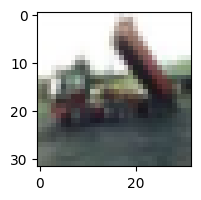

In [36]:
plot_sample(2)

In [37]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [38]:
classes[y_train[4][0]]

'automobile'

In [40]:
classes[y_train[2][0]]

'truck'

## Scaling

In [41]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [42]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [47]:
# Used for OHE
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical( y_test, num_classes=10)

print("Train Catergorical:", y_train_categorical)
print("Test Categorical:", y_test_categorical)

Train Catergorical: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Test Categorical: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## Model Building and Training

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"])
model.fit(X_train_scaled,y_train_categorical,epochs = 50)


Epoch 1/50
  56/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1324 - loss: 2.3038

I0000 00:00:1718373479.776475    1287 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718373479.792201    1287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3007 - loss: 1.9294
Epoch 2/50
  58/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4136 - loss: 1.6498

W0000 00:00:1718373484.606379    1288 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4212 - loss: 1.6386
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4504 - loss: 1.5588
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4711 - loss: 1.4948
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5005 - loss: 1.4278
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5113 - loss: 1.3905
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5266 - loss: 1.3394
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5374 - loss: 1.3145
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5522 - loss: 1.2795
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5673 - loss: 1.2454
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5740 - loss: 1.2167
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5839 - loss: 1.1866
Epoch 13/50
1563/1563 ━━━━━━━━━━━━━━━━━━

### Making Predictions

In [53]:
model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9.5842630e-02, 2.9551011e-01, 7.5817800e-01, 9.9866605e-01,
       9.9196684e-01, 8.2143486e-01, 4.3618497e-02, 3.4244225e-04,
       5.0322264e-01, 1.7529640e-01], dtype=float32)

In [55]:
classes[np.argmax(model.predict(X_test_scaled)[2])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


'ship'

In [57]:
np.argmax(model.predict(X_test_scaled)[4])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


4

In [56]:
classes[np.argmax(model.predict(X_test_scaled)[4])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


'deer'

## Measure training time on a CPU

In [67]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [68]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

   1/1563 ━━━━━━━━━━━━━━━━━━━━ 22:01 846ms/step - accuracy: 0.0312 - loss: 2.5041

2024-06-14 15:13:43.218147: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3008 - loss: 1.9316
1min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Measure training time on a GPU

In [69]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

  50/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1329 - loss: 2.3267 

W0000 00:00:1718378114.322501    1287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3028 - loss: 1.9289
7.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


W0000 00:00:1718378118.708241    1287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [70]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.2997 - loss: 1.9387
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.4228 - loss: 1.6410
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4530 - loss: 1.5545
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.4749 - loss: 1.4838
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.4959 - loss: 1.4295
6min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [71]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
  50/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1370 - loss: 2.3080 

W0000 00:00:1718378604.976122    1287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3024 - loss: 1.9314
Epoch 2/5
  59/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4186 - loss: 1.6295

W0000 00:00:1718378609.414480    1287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4201 - loss: 1.6439
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4520 - loss: 1.5505
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4752 - loss: 1.4898
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4932 - loss: 1.4465
23.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## GPU is 10 TIMES faster than CPU if you compare the time taken to train, thats why GPU is very popular